<a href="https://colab.research.google.com/github/Esha034/-AI-Powered-Sales-Forecasting-Dashboard/blob/main/AI_Powered_Sales_Forecasting_Dashboard_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Clean and Structure Historical Retail Sales **Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load Data
df = pd.read_excel("/content/Sample - Superstore.xlsx")
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#  Step 1.1: Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
#  Step 1.2: Check for missing/null values
missing_data = df.isnull().sum()
print("🔍 Missing Values in Each Column:\n", missing_data)


🔍 Missing Values in Each Column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
#  Step 1.3: Create 'Order Month' for grouping
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)

In [ ]:
# Step 1.4: Group by 'Order Month' and sum Sales
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()


In [ ]:
# Step 1.5: Convert 'Order Month' back to datetime for modeling
monthly_sales['Order Month'] = pd.to_datetime(monthly_sales['Order Month'])


In [ ]:
# Step 1.6: Final structure preview
print("Monthly Sales Data Preview:")
print(monthly_sales.head())

Monthly Sales Data Preview:
  Order Month      Sales
0  2014-01-01  14236.895
1  2014-02-01   4519.892
2  2014-03-01  55691.009
3  2014-04-01  28295.345
4  2014-05-01  23648.287


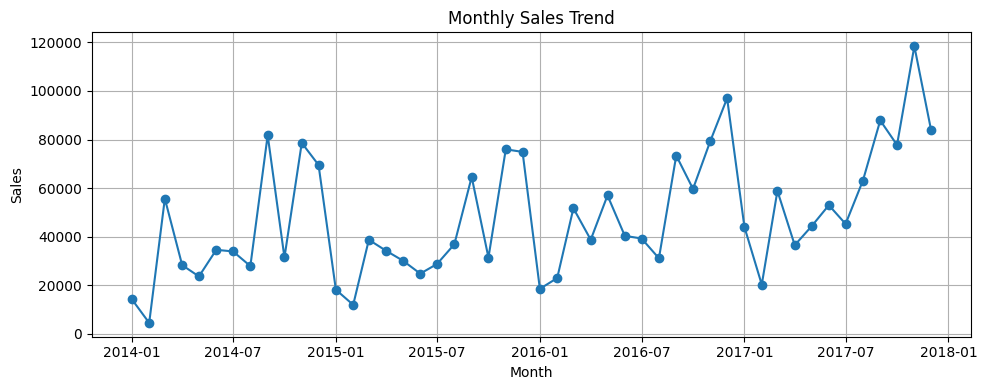

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


#  Step 2: Feature Engineering

In [ ]:
# Extract month, quarter, and year as separate features
monthly_sales['Month'] = monthly_sales['Order Month'].dt.month
monthly_sales['Quarter'] = monthly_sales['Order Month'].dt.quarter
monthly_sales['Year'] = monthly_sales['Order Month'].dt.year

In [ ]:
# Flag holiday season: November (11) and December (12)
monthly_sales['Is_Holiday_Season'] = monthly_sales['Month'].isin([11, 12])

In [ ]:
#  Create a 3-month rolling average of sales
monthly_sales['Sales_Rolling_3'] = monthly_sales['Sales'].rolling(window=3).mean()

In [ ]:
# Previewing the engineered features
monthly_sales.head()

,Order Month,Sales,Month,Quarter,Year,Is_Holiday_Season,Sales_Rolling_3
0,2014-01-01,14236.895,1,1,2014,False,NaN
1,2014-02-01,4519.892,2,1,2014,False,NaN
2,2014-03-01,55691.009,3,1,2014,False,24815.932000
3,2014-04-01,28295.345,4,2,2014,False,29502.082000
4,2014-05-01,23648.287,5,2,2014,False,35878.213667


In [ ]:
# Step 3.1: Prepare data for Prophet
df_prophet = monthly_sales[['Order Month', 'Sales']].rename(columns={'Order Month': 'ds','Sales': 'y'0})

In [ ]:
#  Step 3.2: Initialize the model
model = Prophet()

In [ ]:
# Step 3.3: Fit the model to the historical data
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1trg9py/6p3q4wx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1trg9py/kmmh82em.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63902', 'data', 'file=/tmp/tmpa1trg9py/6p3q4wx0.json', 'init=/tmp/tmpa1trg9py/kmmh82em.json', 'output', 'file=/tmp/tmpa1trg9py/prophet_model2u5hit70/prophet_model-20250720151920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from matplotlib import rcParams

# Set custom figure size for all plots (width, height in inches)
rcParams['figure.figsize'] = (10, 8)

In [ ]:
# Step 3.4: Create future dataframe (12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
# Step 3.5: Forecast future values
forecast = model.predict(future)

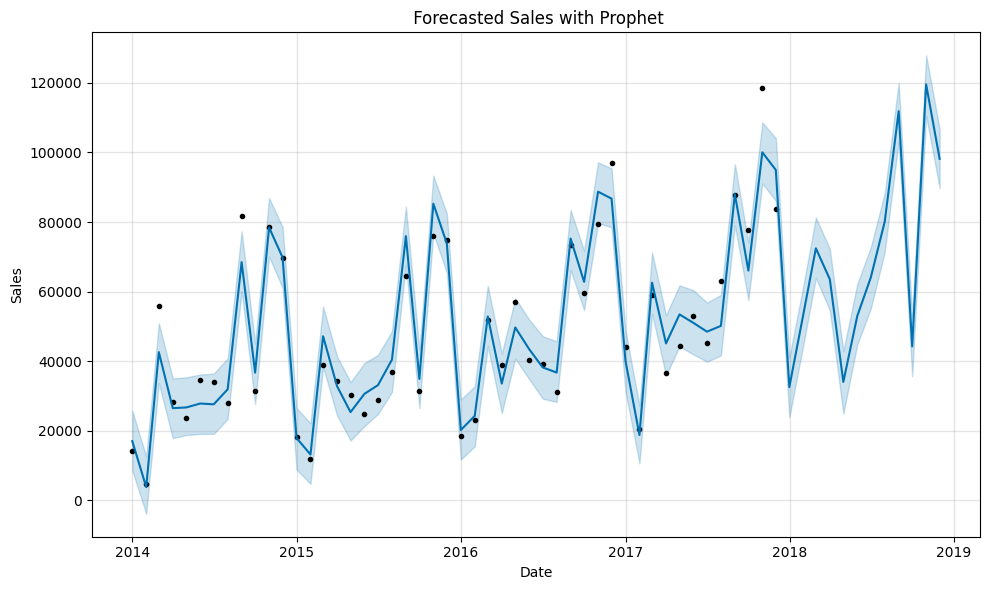

In [ ]:
# Step 3.6: Plot forecast
model.plot(forecast)
plt.title(" Forecasted Sales with Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

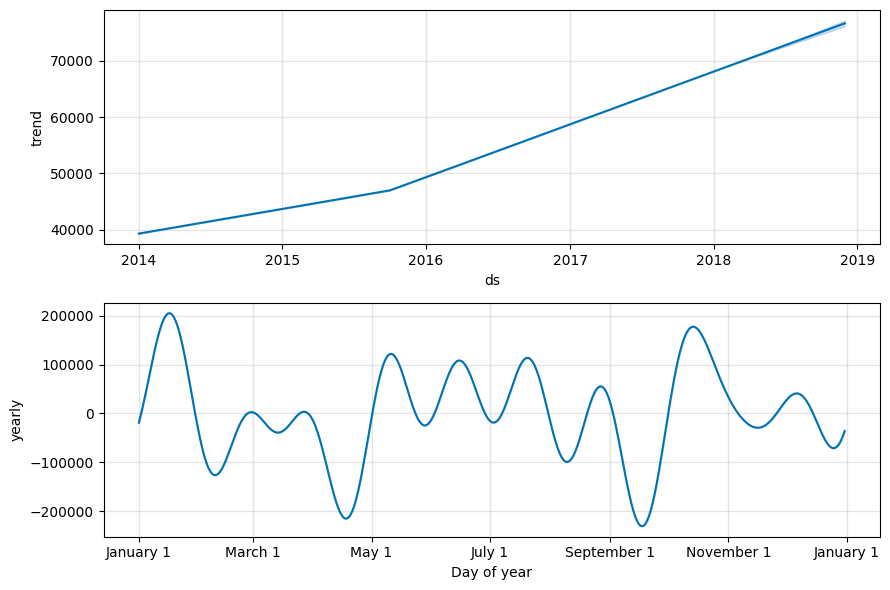

In [ ]:
# Step 3.7: Plot components (trend, seasonality)
model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Step 4:Export Forecast Results to CSV


In [ ]:
# Export forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_output.csv', index=False)


In [ ]:
# Export actual monthly sales
monthly_sales.to_csv('actual_sales.csv', index=False)
